In this notes, I will show three Nearest Neighbour algorithms which are basic, Orchard’s, and Approximating and Eliminating Search Algorithm (AESA). And compare elapsed time consumed for same query respectively. In addition, approaching path tracted in plot will be provided. 

Details refer to:
https://github.com/kUNQIjIANG/siX/blob/master/MachineLearning/reference/note_fast_nearest_neighbour_new.pdf


In [10]:
## Generating 
import numpy as np
pts = 100 * np.random.random((100,2))

In [18]:
def distance(p_1,p_2):
    return np.linalg.norm(p_1-p_2)

### Basic NN

In [152]:
def basic_NN(pts,query):
    query_dis = np.inf
    index = -1
    for i in range(len(pts)):
        cand_dis = distance(pts[i],query)
        if cand_dis < query_dis:
            query_dis  = cand_dis
            index = i
    return index, query_dis
            

### Orchard’s Nearest Neighbour Search

In [93]:
from collections import defaultdict
def dis_dic(points):
    pts_dict = defaultdict(dict)
    num = len(points)
    
    for i in range(num):
        pts_dict[i]['p'] = points[i]
        pts_dict[i]['chk'] = False
        dis = []
        index = []
        others = list(range(i)) + list(range(i+1,num))
        for j in others:
            dis.append(distance(points[i],points[j]))
            index.append(j)
        dis, index = zip(*sorted(zip(dis, index)))
        pts_dict[i]['dis'] = dis
        pts_dict[i]['index'] = index
    return pts_dict

In [118]:
def fast_NN(pts_dict,query):
    num_p = len(pts_dict)
    index = np.random.randint(num_p)
    query_dist = distance(pts_dict[index]['p'],query)
    i = 0
    path = [index]
    while(i<num_p and pts_dict[index]['dis'][i] < 2 * query_dist):
        cand_index = pts_dict[index]['index'][i]
        if pts_dict[cand_index]['chk'] == False:
            
            cand = pts_dict[cand_index]['p']
            cand_dist = distance(query,cand)
            if cand_dist < query_dist:
                query_dist = cand_dist
                index = cand_index
                path.append(index)
                i = 0
            else:
                i += 1
        else:
            i += 1
    return index, query_dist, path

### Approximating and Eliminating Search Algorithm (AESA)

In [ ]:
def bound_dict(I,J,disM):
    for j in J.keys():
        for i in I.keys():
            bound = I[i] - disM[i][j]
            if bound > J[j]:
                J[j] = bound
    return J

In [ ]:
def distance_dict(points):
    dis_dict = defaultdict(dict)
    num = len(points) 
    for i in range(num):
        others = list(range(i)) + list(range(i+1,num))
        for j in others:
            dis_dict[i][j] = distance(points[i],points[j])
    return dis_dict

In [ ]:
def AESA(points,dist_dict,query):
    num = len(points)
    query_dist = np.inf
    I = {}
    J = {k:0 for k in dist_dict.keys()}
    path = []
    while(len(J) != 0):
        cand = min(J,key=J.get)
        cand_dist = distance(points[cand],query)
        I[cand] = cand_dist
        del J[cand]
        if cand_dist < query_dist:
            query_dist = cand_dist
            index = cand
            path.append(index)
        J = bound_dict(I,J,dist_dict)
        J = {k:v for k,v in J.items() if v < query_dist}
    return index, query_dist, path

### Inference time and path comparison

In [137]:
import time
query = [66,66]
start = time.time()
b_index, b_dis = basic_NN(pts,query)
end = time.time()
elapsed = end - start
print("Index: %d, Distance: %.3f" % (b_index, b_dis))
print("Elapsed time: %.10f" % elapsed)

Index: 22, Distance: 2.997
Elapsed time: 0.0027852058


In [138]:
pts_dict = dis_dic(pts)
start = time.time()
f_index, f_dis, path = fast_NN(pts_dict,query)
end = time.time()
elapsed = end - start
print("Index: %d, Distance: %.3f" % (f_index, f_dis))
print("Elapsed time: %.10f" % elapsed)

Index: 22, Distance: 2.997
Elapsed time: 0.0007069111


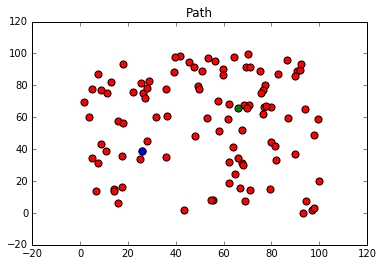

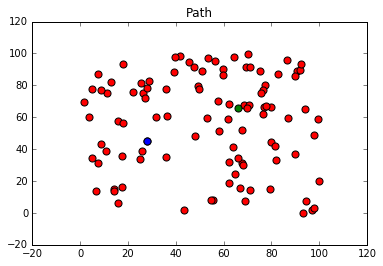

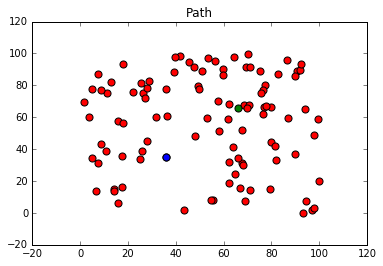

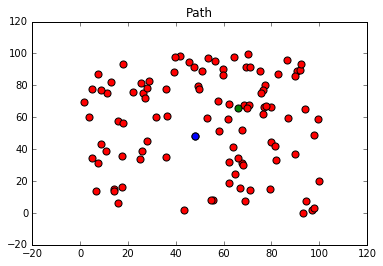

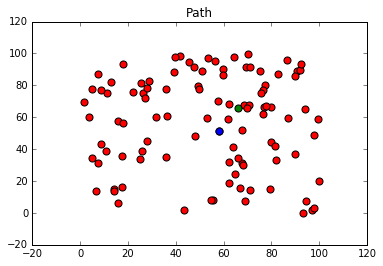

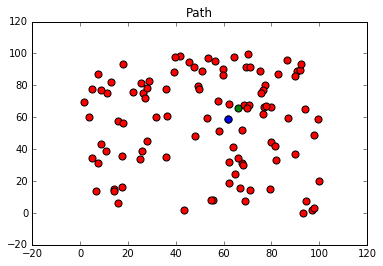

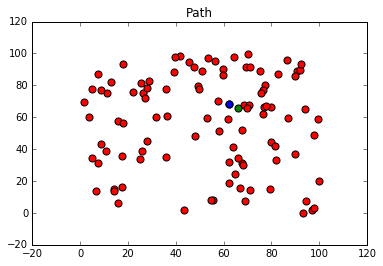

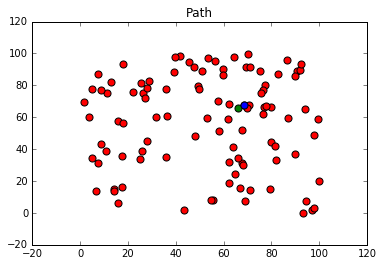

In [146]:
import matplotlib.pyplot as plt
for p in path:
    plt.scatter(pts[:,0],pts[:,1],s=50,c='r')
    plt.scatter(query[0],query[1],s=50,c = 'g')
    plt.scatter(pts[p,0],pts[p,1],s=50,c='b')
    plt.title('Path')
    plt.show()

In [153]:
dist_dict = distance_dict(pts)
start = time.time()
a_index, a_dis, path = AESA(pts,dist_dict,query)
end = time.time()
elapsed = end - start
print("Index: %d, Distance: %.3f" % (a_index, a_dis))
print("Elapsed time: %.10f" % elapsed)

Index: 22, Distance: 2.997
Elapsed time: 0.0016798973


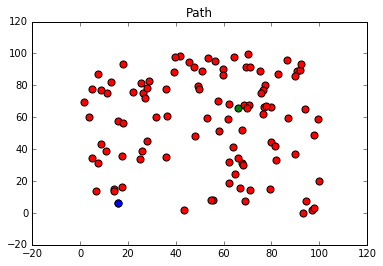

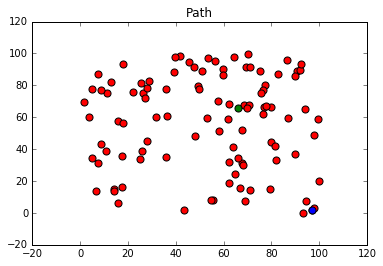

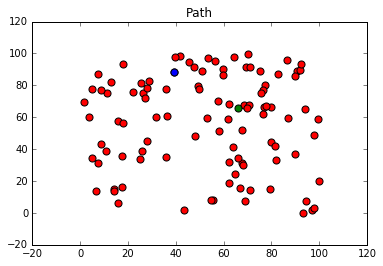

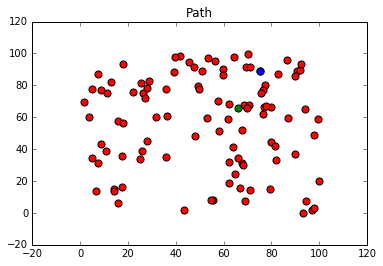

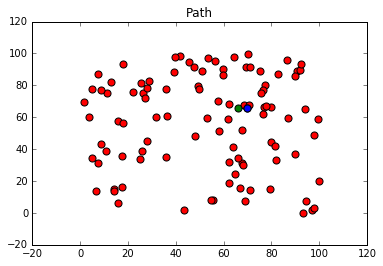

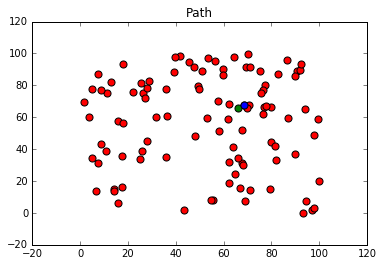

In [151]:
import matplotlib.pyplot as plt
for p in path:
    plt.scatter(pts[:,0],pts[:,1],s=50,c='r')
    plt.scatter(query[0],query[1],s=50,c = 'g')
    plt.scatter(pts[p,0],pts[p,1],s=50,c='b')
    plt.title('Path')
    plt.show()